# Sample code 

*The code, plots, and results shown here are presented and copyrighted under the thesis titled "Dynamics of a charged bouncer under an electric field," in partial fulfillment of the BS Physics program in UP Diliman by Johann Jude Manuel.

The $\texttt{charged\_bouncer}$ program may be imported directly if put in the same folder. Numpy, Scipy's $\texttt{odeint}$ and $\texttt{bisect}$ are dependencies of the program and also need to be imported to work.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import bisect
from charged_bouncer import charged_bouncer

A charged bouncer object can be initialized by inputting values for the system's coefficient of restitution, amplitude and angular frequency of the voltage driving, and resolution of the system simulation. A simulation can then be run by calling the $\texttt{bounce}$ method, which takes as input the simulation run time $[t_i, t_f]$ and initial conditions $\mathbf{r} = (y, v, \theta)$, where $y$ is the disk position, $v$ is the velocity, and $\theta$ is the phase of the sinusoidal driving (or similarly the time component of the ODE).


Note that due to the nature of the collision detection algorithm, it is recommended that a positive initial velocity is input to immediately begin the bouncing motion. Otherwise, the disk being initially stationary will result in an error.

In [4]:
bouncer = charged_bouncer(restitution=0.5, resolution=1e-5, amplitude=1.6, angular_frequency=np.pi)
r = [0, 0.1, 0]
solution = bouncer.bounce(0, 100, r)

The solution returned by $\texttt{bounce}$ is a numpy array, with dimensions similar to that of Scipy's $\texttt{odeint}$ output. The position, velocity, and time/phase values are indexed as,

$$y_{\text{points}} = \text{solution}[:, 0]$$
$$v_{\text{points}} = \text{solution}[:, 1]$$
$$\theta_{\text{points}} = \text{solution}[:, 2]$$

A sample phase space and time series result is shown below.

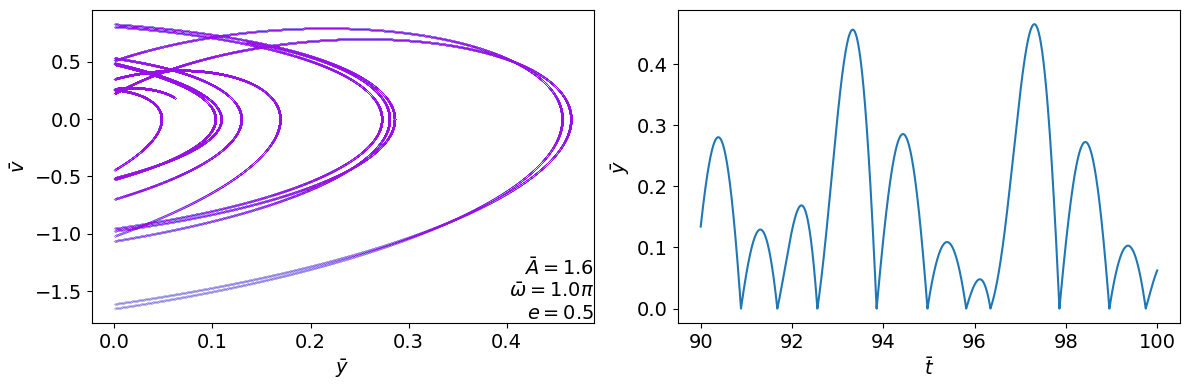

In [ ]:
# Plot only the last 90s to neglect transients
id_90s = np.where(np.round(solution[:, 2] / bouncer.w, 6) == 90)[0][0] 
id_100s = np.where(np.round(solution[:, 2] / bouncer.w, 6) == 100)[0][0]


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(solution[id_90s:id_100s, 0], solution[id_90s:id_100s, 1], s=0.001, alpha=0.05, c='xkcd:violet')
ax[0].set_xlabel(r"$\bar{y}$", fontsize=14)
ax[0].set_ylabel(r"$\bar{v}$", fontsize=14)

time = np.array(solution[id_90s:id_100s, 2]) / bouncer.w 

ax[1].plot(np.array(time), solution[id_90s:id_100s, 0])
ax[1].set_xlabel(r"$\bar{t}$", fontsize=14)
ax[1].set_ylabel(r"$\bar{y}$", fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

s = str(r"$\bar{A} = $" + str(round(bouncer.A, 5)) + "\n" + r"$\bar{\omega} = $" + str(round(bouncer.w/np.pi, 5)) + r"$\pi$" + "\n" + r"$e = $" + str(bouncer.restitution))
ax[0].annotate(s, xy=(1, 0), xycoords='axes fraction', fontsize=14, horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()

Built-in functions for stroboscopic (where data is sampled for every period of the sinusoidal driving) and impact (where data is sampled every time the disk impacts with a capacitor plate) maps are also available under the $\texttt{phase\_section}$ and $\texttt{impact\_section}$ methods, as shown below.

In [7]:
bouncer = charged_bouncer(restitution=0.5, resolution=1e-5, amplitude=1.4, angular_frequency=3*np.pi)
r = [0, 0.1, 0]

solution = bouncer.bounce(0, 200, r)
y_sampled, v_sampled = bouncer.phase_section(0, 200, r)
impact_velocity, impact_phase, num_impacts = bouncer.impact_section(r, 200)

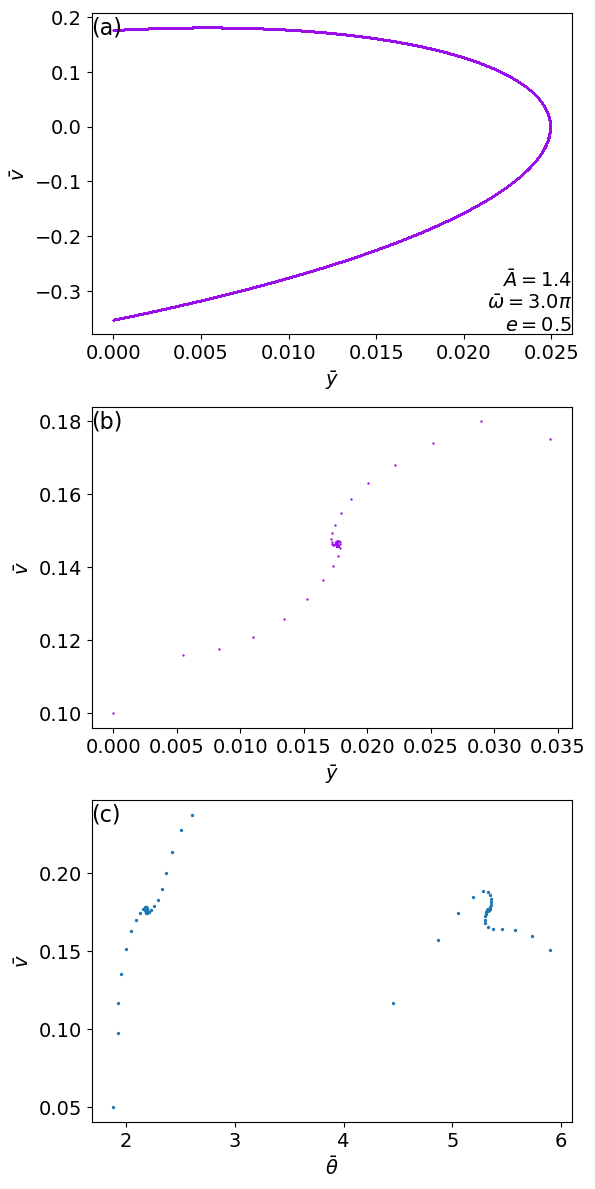

In [11]:
# Display from t = 70 to neglect transients
index_70s = np.where(np.round(solution[:, 2] / bouncer.w, 6) == 70)[0][0]


fig, ax = plt.subplots(3, 1, figsize=(6, 12))
ax[0].scatter(solution[index_70s:, 0], solution[index_70s:, 1], s=0.001, alpha=0.05, c='xkcd:violet')
ax[0].set_xlabel(r"$\bar{y}$", fontsize=14)
ax[0].set_ylabel(r"$\bar{v}$", fontsize=14)

s = str(r"$\bar{A} = $" + str(round(bouncer.A, 5)) + "\n" + r"$\bar{\omega} = $" + str(round(bouncer.w/np.pi, 5)) + r"$\pi$" + "\n" + r"$e = $" + str(bouncer.restitution))
ax[0].annotate(s, xy=(1, 0), xycoords='axes fraction', fontsize=14, horizontalalignment='right', verticalalignment='bottom')

ax[1].scatter(y_sampled[:], v_sampled[:], s=0.5, c='xkcd:violet')
ax[1].set_xlabel(r"$\bar{y}$", fontsize=14)
ax[1].set_ylabel(r"$\bar{v}$", fontsize=14)

ax[2].scatter(np.array(impact_phase[:])%(2*np.pi), impact_velocity[:], s=2)
ax[2].set_xlabel(r"$\bar{\theta}$", fontsize=14)
ax[2].set_ylabel(r"$\bar{v}$", fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[0].annotate("(a)", xy=(0, 0.99), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
ax[1].annotate("(b)", xy=(0, 0.99), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
ax[2].annotate("(c)", xy=(0, 0.99), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')

plt.tight_layout()

For more details on the system and algorithm, please check the thesis "Dynamics of a charged bouncer under an electric field," or contact me directly at johannjude.main@gmail.com